In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
dataset1 = pd.read_csv('data1.csv')

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize (creds)

In [ ]:
worksheet = gc.open('MyMLData').sheet1
data= worksheet.get_all_values()

In [ ]:
dataset1= pd.DataFrame (data [1:], columns=data[0])
dataset1= dataset1.astype({'X': 'float'})
dataset1 = dataset1.astype({'Y': 'float'})

In [ ]:
dataset1.head()

,X,Y
0,1.0,3.0
1,2.0,4.0
2,3.0,5.0
3,4.0,6.0
4,5.0,7.0


In [ ]:
X=dataset1[['X']].values
y=dataset1[['Y']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=33)
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1=Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(8,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop', loss = 'mse')

In [ ]:
ai_brain.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 169.4419
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 168.6122
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 168.0054
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 167.4959
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 167.0434
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 166.6283
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 166.2390
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 165.8690
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 165.5145
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 165.1730
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 164.8409
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 164.5168
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 164.1989
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 163.8883
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44

<Axes: >

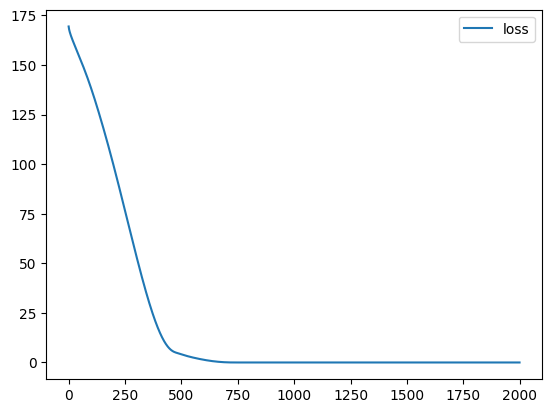

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

ai_brain.evaluate(X_test1,y_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.3248e-04


0.0009324782295152545

In [ ]:
X_n1 = [[14]]

X_n1_1= Scaler.transform(X_n1)

ai_brain.predict(X_n1_1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[15.966839]], dtype=float32)